In [34]:

import numpy as np
from scipy.stats import triang
import matplotlib.pyplot as plt
import math

# recursive algorithm to find the time to complete an individual task. 
def findTime(name):
    if not len(predecessDict[name]):
        return 0 + indivTimes[name]
    intermedTimes = []
    for val in predecessDict[name]:
        intermedTimes.append(findTime(val) + indivTimes[name])
    return max(intermedTimes)

# lists to list direct predecessors for each task
aPredecess = []
bPredecess = ["A"]
cPredecess = ["A"]
dPredecess = ["C"]
ePredecess = ["A"]
fPredecess = ["B"]
gPredecess = ["C"]
hPredecess = ["C"]
iPredecess = ["F", "H"]
jPredecess = ["I", "G"]
predecessDict = {"A": aPredecess, "B": bPredecess, "C": cPredecess, "D": dPredecess, "E": ePredecess, "F": fPredecess, "G": gPredecess, "H": hPredecess, "I": iPredecess, "J": jPredecess}

# list of all the task names
taskList = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J"]

# list with each trial's total time to complete all tasks
trialTimes = []
# sample mean
sampleMean = 0
# number of trials
numTrials = 1000

# create numTrial values depending on parameters for each tasks time to complete. 
tA = triang.rvs(0.5, 2, 2, numTrials)
tB = triang.rvs(0.5, 1, 2, numTrials)
tC = triang.rvs(0.5, 2, 8, numTrials)
tD = triang.rvs(0.5, 1, 2, numTrials)
tE = triang.rvs(0.5, 1, 4, numTrials)
tF = triang.rvs(0.5, 2, 2, numTrials)
tG = triang.rvs(0.5, 3, 4, numTrials)
tH = triang.rvs(0.5, 0.5, 1, numTrials)
tI = triang.rvs(0.5, 1, 1, numTrials)
tJ = triang.rvs(0.5, 1, 2, numTrials)

# value for when one needs to find probability will finish before 'targetTime' days. needs to be changed so user can input. Basically, this is for P(X < targetTime)
targetTime = 18
pHat = 0

# runs the findTime function on all tasks for x number of trials and puts result in trialTimes list
for x in range(numTrials):
    # time to complete individual task
    indivTimes = {"A": tA[x], "B": tB[x], "C": tC[x], "D": tD[x], "E": tE[x], "F": tF[x], "G": tG[x], "H": tH[x], "I": tI[x], "J": tJ[x]}
    # time to complete task and all prerequisites
    totalTime = {}

    for val in taskList:
        totalTime[val] = findTime(val)

    thisCompletionTime = totalTime[max(totalTime)]
    trialTimes.append(thisCompletionTime)
    sampleMean += thisCompletionTime/numTrials

    if thisCompletionTime < targetTime:
        pHat += 1/numTrials

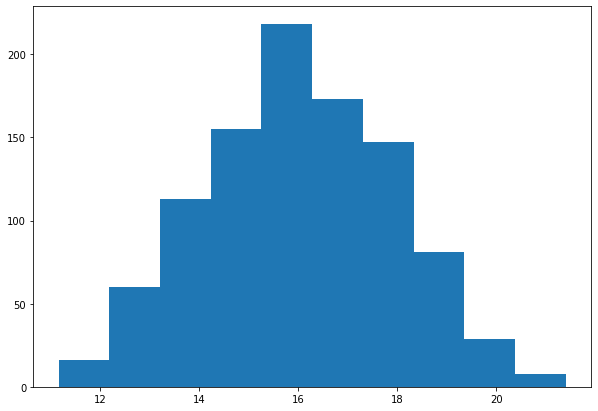

Average Time to Complete all Tasks: 16.01454088758304
Based on this sample, the probability that all tasks finished before 18 days is 0.8420000000000006
Sample Variance is 3.6300164407456004
Standard Deviation is 1.9052602028976515
95 percent confident that true mean lies between 15.896451636764988 and 16.132630138401087
95 percent confident that true probability all tasks finished before 18 is between 0.8193818064319838 and 0.8646181935680175


In [35]:
# rudimentary histogram to show results of trials
x = np.array(trialTimes)
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(x)
plt.show()

# sample variance
sampleVariance = 0
for time in trialTimes:
    sampleVariance += pow(time - sampleMean, 2)/(numTrials-1)
standardDev = math.sqrt(sampleVariance)

# zScore for 95% confidence interval for finish time
zScore = 1.96
confIntLowMean = sampleMean - (zScore*standardDev/math.sqrt(numTrials))
confIntHighMean = sampleMean + (zScore*standardDev/math.sqrt(numTrials))

# 95% confidence interval for probability finish by targetTime
confIntLowProb = pHat - zScore*(math.sqrt((pHat * (1-pHat))/(numTrials-1)))
confIntHighProb = pHat + zScore*(math.sqrt((pHat * (1-pHat))/(numTrials-1)))

# prints average time to complete all tasks
print("Average Time to Complete all Tasks: " + str(sampleMean))
# prints P(X < targetTime) where X represent time to finish all tasks
print("Based on this sample, the probability that all tasks finished before " + str(targetTime) + " days is " + str(pHat))
print("Sample Variance is " + str(sampleVariance))
print("Standard Deviation is " + str(standardDev))
print("95 percent confident that true mean lies between " + str(confIntLowMean) + " and " + str(confIntHighMean))
print("95 percent confident that true probability all tasks finished before " + str(targetTime) + " is between " + str(confIntLowProb) + " and " + str(confIntHighProb))



In [ ]:

# will try my DiGraph implementation here later after first doing a recursive implementation attempt

graph = nx.DiGraph()